Advanced Classification Predict

Thandokazi Dlamini

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
# Load training and test data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test_with_no_labels.csv")

In [15]:
train_data.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [16]:
test_data.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [17]:
train_data.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiment Distribution')

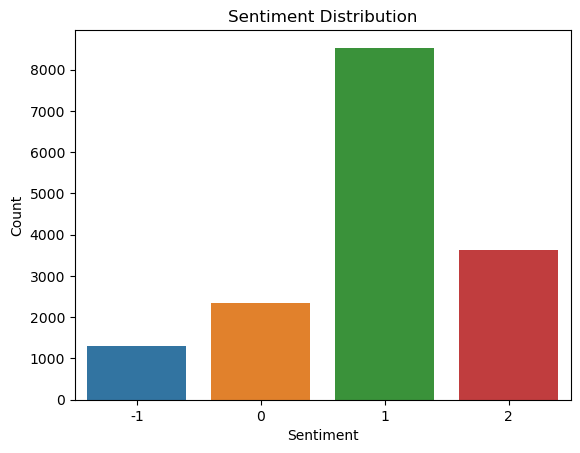

In [19]:
plot = train_data['sentiment'].value_counts()
sns.barplot(x=plot.index, y=plot.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')


In [21]:
#Pre process the data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "[USERNAME]", text)
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

In [22]:
X = train_data["message"]
y = train_data["sentiment"]

In [23]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [24]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [25]:
# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
}


In [26]:
# Create a grid search object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1_macro')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [27]:
# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

In [28]:
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 10, 'solver': 'lbfgs'}


In [29]:
# Generate a classification report without specifying target_names
class_report = classification_report(y_valid, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          -1       0.67      0.49      0.57       278
           0       0.52      0.48      0.50       425
           1       0.79      0.83      0.81      1755
           2       0.77      0.77      0.77       706

    accuracy                           0.74      3164
   macro avg       0.68      0.64      0.66      3164
weighted avg       0.73      0.74      0.74      3164



In [30]:
# Preprocess test data and predict sentiments
X_test = test_data["message"]
X_test_tfidf = tfidf_vectorizer.transform(X_test)
test_predictions = best_model.predict(X_test_tfidf)

In [31]:
submission_df = pd.DataFrame({'tweetid': test_data['tweetid'], 'sentiment': test_predictions})
submission_df.head()


,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [5]:
submission_df.to_csv('Thandokazi_Dlamini_first_submission.csv', index=False)